# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

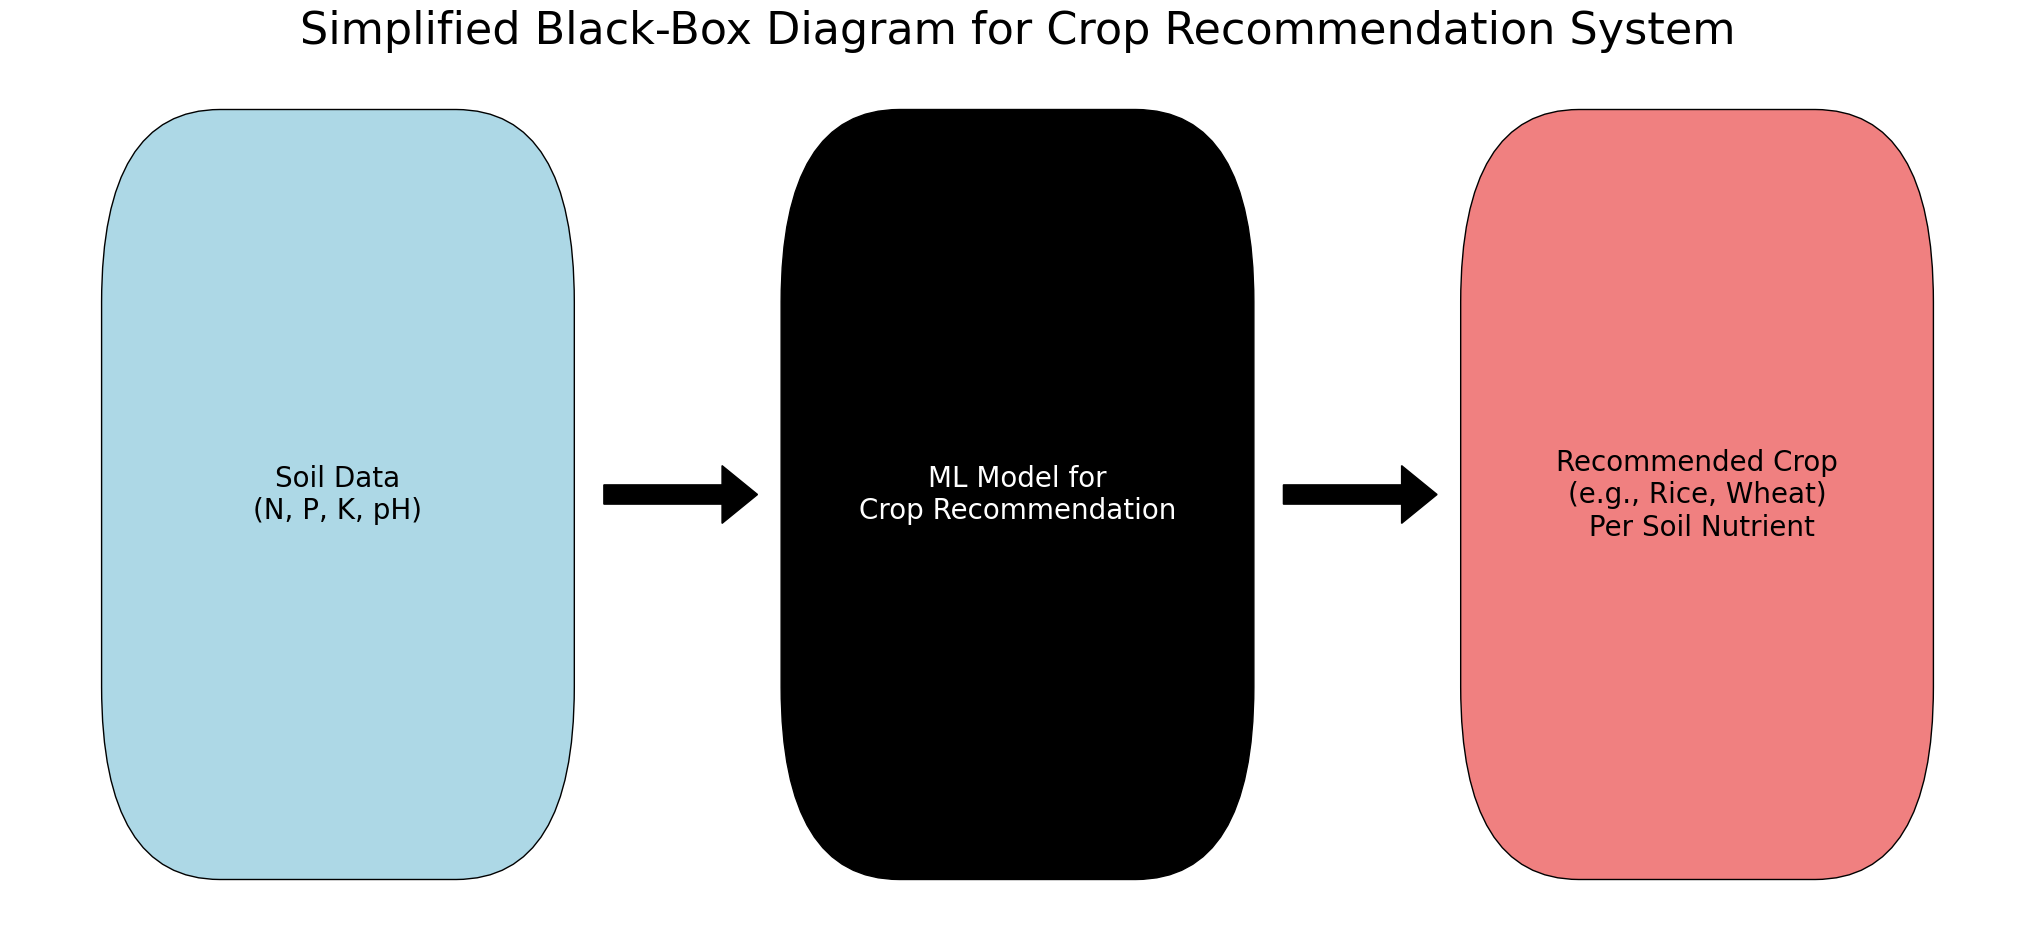

In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(26,11))
ax.axis('off')  # Turn off the axis

# Input Box (Soil Data)
input_box = FancyBboxPatch((0.05, 0.4), 0.2, 0.2, boxstyle="round,pad=0.1", edgecolor="black", facecolor="lightblue")
ax.add_patch(input_box)
ax.text(0.15, 0.5, "Soil Data\n(N, P, K, pH)", ha="center", va="center", fontsize=20)

# Arrow from Input to Model
ax.arrow(0.375, 0.5, 0.1, 0, width=0.01, head_width=0.03, head_length=0.03, fc="black", ec="black")

# ML Model Box
model_box = FancyBboxPatch((0.625, 0.4), 0.2, 0.2, boxstyle="round,pad=0.1", edgecolor="black", facecolor="black")
ax.add_patch(model_box)
ax.text(0.725,  0.5, "ML Model for\nCrop Recommendation", ha="center", va="center", fontsize=20, color='white')

# Arrow from Model to Output
ax.arrow(0.95, 0.5, 0.1, 0, width=0.01, head_width=0.03, head_length=0.03, fc="black", ec="black")

# Output Box (Recommended Crop)
output_box = FancyBboxPatch((1.2, 0.4), 0.2, 0.2, boxstyle="round,pad=0.1", edgecolor="black", facecolor="lightcoral")
ax.add_patch(output_box)
ax.text(1.3, 0.5, "Recommended Crop\n(e.g., Rice, Wheat)\n Per Soil Nutrient", ha="center", va="center", fontsize=20)

# Title
ax.set_title("Simplified Black-Box Diagram for Crop Recommendation System", fontsize=32, pad=20)

plt.show()


In [3]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Explore the dataset
print(crops.info(show_counts=True))

print(crops.crop.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None
crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


As per the last code line, there are no NAN values in any of the 5 Columns and that their data type is numeric for the predictor columns, thus proving that the requirements for the model are met. Additionally, the classes in the target variable appear to be balanced.

In [4]:
# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

The data for the model was split into testing and training. For this, the crops DataFrame was split into the dependant and independant variables, X and Y accordingly. The test size was set to be 30% of the data and a random seed of 42 was selected in order to ensure reproducibility of the model.

A dictionary will be initialized to store the model's performance for each of the 4 predictors and the model will loop over the information to obtain the best model. A multinomial logistic regression model will be used and evaluated using the balanced Accuracy as score since classes are balanced. A dictionary called "best_predictive_feature" will hold the best feature and its score.

In [5]:
# Create a dictionary to store the model performance for each feature
feature_performance = {}

# Train a logistic regression model for each feature
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])

    # Calculate  balanced_accuracy_score
    bac = metrics.balanced_accuracy_score(y_test, y_pred)
    
    # Add feature-f1 score pairs to the dictionary
    feature_performance[feature] = bac
    print(f"BAC for {feature}: {bac}")
    

# K produced the best BAC score
# Store in best_predictive_feature dictionary
best_predictive_feature = {"K": feature_performance["K"]}
best_predictive_feature

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

BAC for N: 0.15608590397635022
BAC for P: 0.19467836809370756
BAC for K: 0.2921670561912657
BAC for ph: 0.12073960014119281


c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

{'K': np.float64(0.2921670561912657)}

Potassium appears to be the best predictor, with an accuracy of 0.292 approximately.

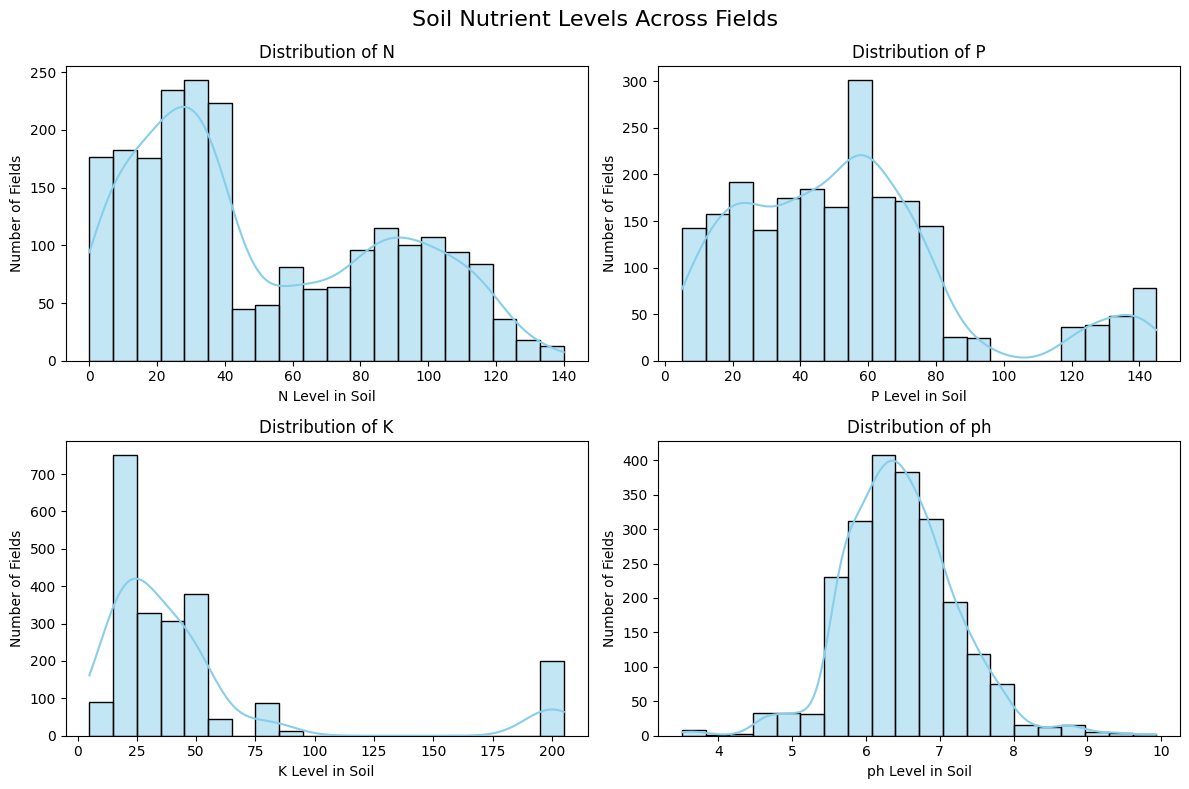

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
soil_features = ["N", "P", "K", "ph"]
plt.figure(figsize=(12, 8))

for i, feature in enumerate(soil_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(crops[feature], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(f"{feature} Level in Soil")
    plt.ylabel("Number of Fields")
    

plt.suptitle("Soil Nutrient Levels Across Fields", fontsize=16)
plt.tight_layout()
plt.show()


Across all crops and fields, here are the levels of nutrients and their distribution

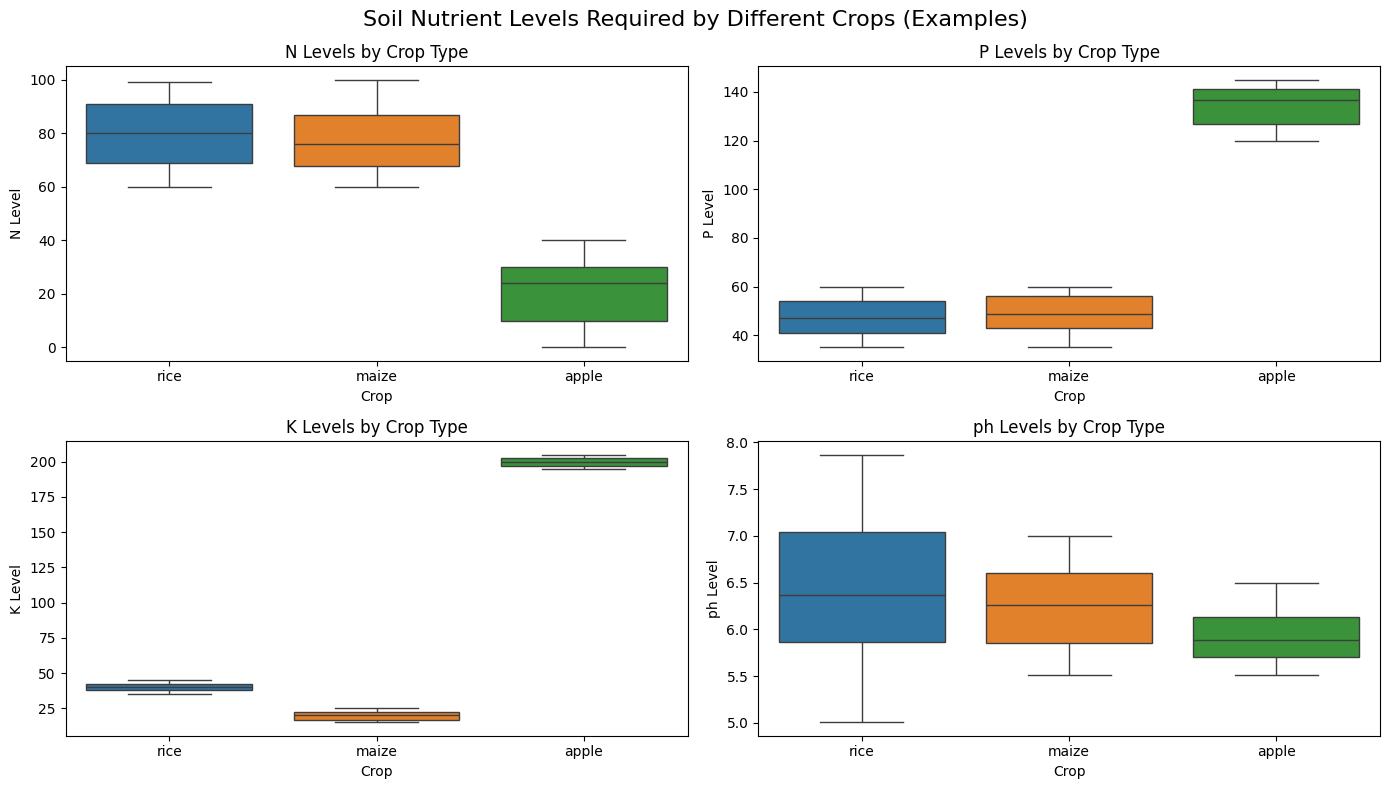

In [7]:
sample_crops = ["rice", "wheat", "maize", "apple"]  # Select a few crops for simplicity
crops_sample = crops[crops["crop"].isin(sample_crops)]

plt.figure(figsize=(14, 8))
for i, feature in enumerate(soil_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=crops_sample, x="crop", y=feature, hue="crop", legend=False)
    plt.title(f"{feature} Levels by Crop Type")
    plt.xlabel("Crop")
    plt.ylabel(f"{feature} Level")

plt.suptitle("Soil Nutrient Levels Required by Different Crops (Examples)", fontsize=16)
plt.tight_layout()
plt.show()

Soil nutrients required by crops. Note that the dataset involves level of nutrients for healthy crops, thus yielding a distribution of them

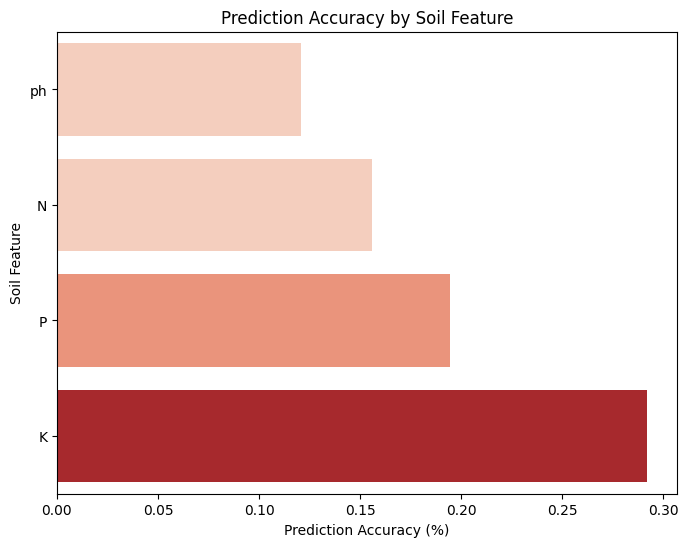

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming feature_performance is already defined
# Sort the feature performance dictionary by accuracy values
sorted_items = sorted(feature_performance.items(), key=lambda x: x[1])
sorted_feature_names = [item[0] for item in sorted_items]
sorted_bac_scores = [item[1] for item in sorted_items]

# Normalize the scores for color mapping
norm = plt.Normalize(min(sorted_bac_scores), max(sorted_bac_scores))
colors = sns.color_palette("Reds", len(sorted_bac_scores))

# Create a color mapping based on the normalized scores
color_mapping = [colors[int(norm(score) * (len(colors) - 1))] for score in sorted_bac_scores]

plt.figure(figsize=(8, 6))
# Use Seaborn's barplot for horizontal bars
sns.barplot(x=sorted_bac_scores, y=sorted_feature_names, hue=sorted_feature_names, palette=color_mapping, legend=False)

# Add title and labels
plt.title("Prediction Accuracy by Soil Feature")
plt.xlabel("Prediction Accuracy (%)")
plt.ylabel("Soil Feature")

plt.show()


Here's the model's accuracy related to the soil feature.

c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model accuracy: 0.6515151515151515


C:\Users\juanc\AppData\Local\Temp\ipykernel_6436\3614791016.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


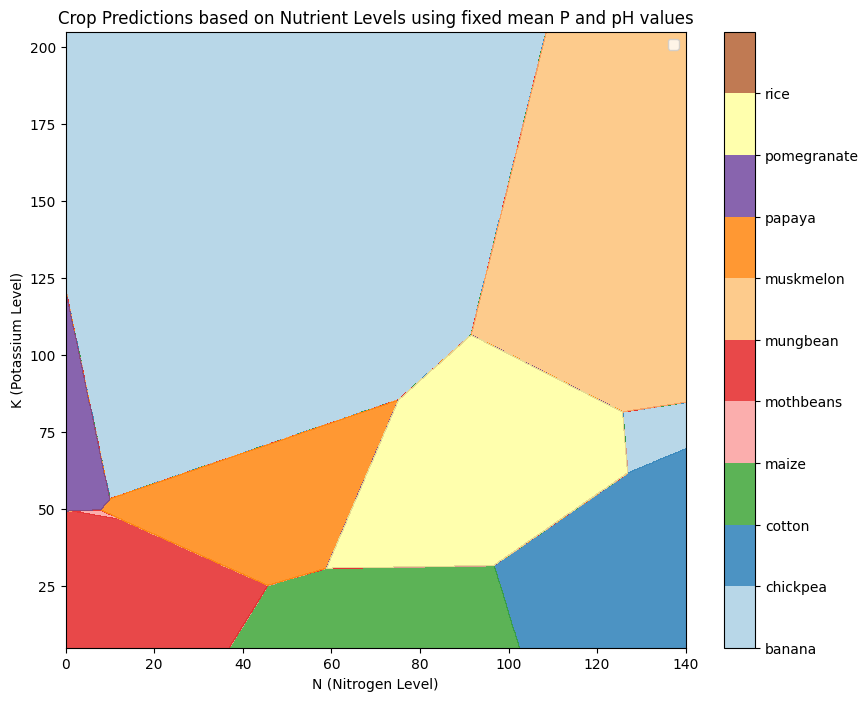

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Assuming the 'crops' DataFrame is already defined with columns: 'N', 'P', 'K', 'ph', and 'crop'

# Split into feature and target sets
X = crops.drop(columns="crop")  # Nutrient columns: 'N', 'P', 'K', 'ph'
y = crops["crop"]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model using all scaled features
log_reg_full = LogisticRegression(multi_class="multinomial", max_iter=200)  # Increase max_iter if needed
log_reg_full.fit(X_train_scaled, y_train)

# Optionally, evaluate the model
y_pred = log_reg_full.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Define a smaller range for each nutrient
N_range = np.linspace(X['N'].min(), X['N'].max(), 1200)
K_range = np.linspace(X['K'].min(), X['K'].max(), 1200)

# Create a meshgrid for the defined ranges
N_grid, K_grid = np.meshgrid(N_range, K_range, indexing='ij')

# Create the grid DataFrame for predictions, fixing other nutrients
mean_ph = X['ph'].mean()
mean_P = X['P'].mean()

grid = pd.DataFrame({
    'N': N_grid.ravel(),
    'P': mean_P,  # Using fixed mean value for P
    'K': K_grid.ravel(),
    'ph': mean_ph  # Using fixed mean value for ph
})

# Scale the grid
grid_scaled = scaler.transform(grid)

# Make predictions
predictions = log_reg_full.predict(grid_scaled)

# Convert predictions to a NumPy array (if not already)
predictions = np.array(predictions)

# Check and convert predictions to numeric values if they are not
if predictions.dtype == object:  # Check if it's an object type
    unique_classes = np.unique(predictions)
    # Create a mapping from class names to integers
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
    predictions = np.array([class_mapping[label] for label in predictions])

# Check for NaN or invalid values in predictions
if not np.all(np.isfinite(predictions)):
    print("Invalid values detected in predictions!")
    print(predictions[~np.isfinite(predictions)])  # Show problematic values

# Reshape predictions to match the grid shape
predictions_reshaped = predictions.reshape(N_grid.shape)

# Create a mapping for crop names based on unique classes
crop_mapping = {i: label for i, label in enumerate(unique_classes)}

# Create a contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(N_grid, K_grid, predictions_reshaped, levels=np.arange(len(unique_classes)+1), cmap='Paired', alpha=0.8)

# Create a colorbar
cbar = plt.colorbar(contour, ticks=np.arange(len(unique_classes)))  # Setting ticks for each crop
cbar.ax.set_yticklabels([crop_mapping[i] for i in range(len(unique_classes))])  # Set labels to the crop names

plt.title("Crop Predictions based on Nutrient Levels using fixed mean P and pH values")
plt.xlabel("N (Nitrogen Level)")
plt.ylabel("K (Potassium Level)")
plt.legend()
plt.show()


For a fixed pH and P values, several crops are sampled to note what to plant according to the soil actual Nitrogen and Potassium Levels